In [11]:
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import zscore
import seaborn as sns

In [6]:
df= pd.read_csv("loan.csv")

In [8]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


C:\Users\Bank of America\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='LotFrontage'>

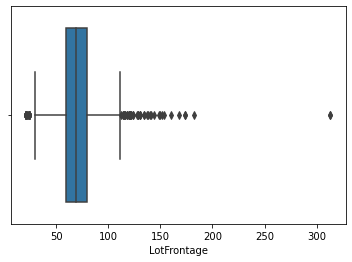

In [10]:
sns.boxplot(df.LotFrontage)

In [21]:
# FInd int datatypes for Z score

column_int= [column for column in df.columns if df[column].dtypes!='O']
column_int

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [28]:
df[column_int]

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,0,40,0,0,0,0,0,8,2007,175000
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,349,0,0,0,0,0,0,2,2010,210000
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,366,0,112,0,0,0,0,4,2010,142125


In [25]:
# another way to have integer column is

column_integer= df.select_dtypes(np.number)

In [27]:
column_integer

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,0,40,0,0,0,0,0,8,2007,175000
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,349,0,0,0,0,0,0,2,2010,210000
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,366,0,112,0,0,0,0,4,2010,142125


# Z score

In [32]:
zscore(column_integer)

array([[-1.73086488,  0.07337496,         nan, ..., -1.5991111 ,
         0.13877749,  0.34727322],
       [-1.7284922 , -0.87256276,         nan, ..., -0.48911005,
        -0.61443862,  0.00728832],
       [-1.72611953,  0.07337496,         nan, ...,  0.99089135,
         0.13877749,  0.53615372],
       ...,
       [ 1.72611953,  0.30985939,         nan, ..., -0.48911005,
         1.64520971,  1.07761115],
       [ 1.7284922 , -0.87256276,         nan, ..., -0.8591104 ,
         1.64520971, -0.48852299],
       [ 1.73086488, -0.87256276,         nan, ..., -0.1191097 ,
         0.13877749, -0.42084081]])

In [33]:
z= np.abs(zscore(column_integer))

In [34]:
z

array([[1.73086488, 0.07337496,        nan, ..., 1.5991111 , 0.13877749,
        0.34727322],
       [1.7284922 , 0.87256276,        nan, ..., 0.48911005, 0.61443862,
        0.00728832],
       [1.72611953, 0.07337496,        nan, ..., 0.99089135, 0.13877749,
        0.53615372],
       ...,
       [1.72611953, 0.30985939,        nan, ..., 0.48911005, 1.64520971,
        1.07761115],
       [1.7284922 , 0.87256276,        nan, ..., 0.8591104 , 1.64520971,
        0.48852299],
       [1.73086488, 0.87256276,        nan, ..., 0.1191097 , 0.13877749,
        0.42084081]])

In [35]:
print(np.where(z>3))

(array([   1,    3,    5,    7,    8,    9,    9,   17,   24,   26,   28,
         33,   37,   39,   41,   46,   48,   48,   50,   51,   52,   53,
         53,   53,   53,   55,   58,   64,   70,   72,   74,   78,   80,
         88,   88,   93,   93,   93,  102,  104,  113,  116,  116,  118,
        120,  125,  125,  129,  129,  137,  137,  144,  144,  153,  154,
        159,  165,  165,  166,  166,  166,  169,  170,  176,  176,  178,
        178,  178,  182,  185,  185,  185,  185,  185,  185,  185,  187,
        188,  188,  188,  189,  189,  191,  196,  197,  197,  197,  197,
        197,  198,  201,  205,  213,  215,  218,  218,  224,  224,  224,
        233,  237,  241,  245,  246,  246,  249,  249,  250,  251,  253,
        253,  258,  260,  260,  263,  263,  267,  271,  273,  278,  280,
        289,  291,  291,  293,  297,  298,  298,  299,  300,  304,  304,
        304,  304,  306,  309,  312,  312,  313,  313,  313,  314,  314,
        322,  325,  326,  328,  330,  330,  330,  

In [37]:
z[1][18]

3.948809348331338

In [41]:
z

array([[1.73086488, 0.07337496,        nan, ..., 1.5991111 , 0.13877749,
        0.34727322],
       [1.7284922 , 0.87256276,        nan, ..., 0.48911005, 0.61443862,
        0.00728832],
       [1.72611953, 0.07337496,        nan, ..., 0.99089135, 0.13877749,
        0.53615372],
       ...,
       [1.72611953, 0.30985939,        nan, ..., 0.48911005, 1.64520971,
        1.07761115],
       [1.7284922 , 0.87256276,        nan, ..., 0.8591104 , 1.64520971,
        0.48852299],
       [1.73086488, 0.87256276,        nan, ..., 0.1191097 , 0.13877749,
        0.42084081]])

In [50]:
df[z<3]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [51]:
df[(z<3).all(axis=1)  ]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
